In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# EDA

Read in data and explore

In [59]:
# read the files
df_train = pd.read_csv("Data/train.csv")
df_test = pd.read_csv("Data/test.csv")

In [60]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,510.0,21748.831373,7344.314902,3841.00,18547.750,23196.50,27881.5000,31422.00
screen_size,510.0,14.648235,1.606050,10.10,13.300,15.60,15.6000,17.30
pixels_x,510.0,1865.972549,565.111787,1280.00,1366.000,1920.00,1920.0000,3840.00
pixels_y,510.0,1074.564706,354.346764,768.00,768.000,1080.00,1080.0000,2160.00
touchscreen,510.0,0.347059,0.476502,0.00,0.000,0.00,1.0000,1.00
detachable_keyboard,506.0,0.035573,0.185407,0.00,0.000,0.00,0.0000,1.00
discrete_gpu,510.0,0.290196,0.454298,0.00,0.000,0.00,1.0000,1.00
ram,510.0,9.590196,6.246940,2.00,4.000,8.00,16.0000,64.00
ssd,510.0,198.909804,244.424611,0.00,0.000,128.00,256.0000,2000.00
storage,510.0,574.749020,517.445695,16.00,128.000,500.00,1000.0000,4000.00


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 22 columns):
id                     510 non-null int64
name                   510 non-null object
brand                  510 non-null object
base_name              510 non-null object
screen_size            510 non-null float64
pixels_x               510 non-null int64
pixels_y               510 non-null int64
screen_surface         498 non-null object
touchscreen            510 non-null int64
cpu                    510 non-null object
cpu_details            504 non-null object
detachable_keyboard    506 non-null float64
discrete_gpu           510 non-null int64
gpu                    508 non-null object
os                     508 non-null object
os_details             508 non-null object
ram                    510 non-null int64
ssd                    510 non-null int64
storage                510 non-null int64
weight                 506 non-null float64
min_price              510 non-null floa

In [62]:
df_train.head()

,id,name,brand,base_name,screen_size,pixels_x,pixels_y,screen_surface,touchscreen,cpu,...,discrete_gpu,gpu,os,os_details,ram,ssd,storage,weight,min_price,max_price
0,7774,Lenovo Flex 3 15.6-Inch Touchscreen Laptop (Co...,Lenovo,Lenovo Flex 3 80JM002CUS,15.6,1920,1080,Glossy,1,Intel Core i7,...,0,Intel HD,Windows,Windows 10,8,0,1000,4.60,899.00,899.00
1,25926,Razer Blade 15 Gaming Laptop: Intel Core i7-87...,Razer,Razer Blade 15,15.6,1920,1080,Matte,0,Intel Core i7,...,1,NVIDIA GeForce RTX 2070 Max-Q,Windows,Windows 10 Home,16,512,512,4.63,2099.99,2099.99
2,25267,Hp 15.6 Inch HD Thin and Light Laptop ( 7th Ge...,HP,HP,15.6,1366,768,NaN,0,AMD A6,...,0,AMD Radeon R4,Windows,Windows 10,8,0,500,4.63,439.00,449.00
3,22367,"Acer Aspire E 15, 15.6"" Full HD, 8th Gen Intel...",Acer,Acer Aspire E5-576,15.6,1920,1080,Matte,0,Intel Core i3,...,0,Intel UHD 620,Windows,Windows 10 Home,6,0,1000,5.30,375.00,449.00
4,17471,"HP 17.3 inch (1600 x 900) HD+ Laptop PC, Intel...",HP,HP 17,17.3,1600,900,Glossy,0,Intel Core i5,...,0,Intel HD 620,Windows,Windows 10,8,0,1000,5.80,559.00,559.00


In [63]:
df_train["brand"].unique()
df_train["cpu"].unique()
df_train["gpu"].unique()

array(['Intel HD', 'NVIDIA GeForce RTX 2070 Max-Q', 'AMD Radeon R4',
       'Intel UHD 620', 'Intel HD 620', 'Intel HD 400',
       'NVIDIA GeForce GTX 1070', 'Intel HD 500', 'Intel HD 4400',
       'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce GTX 1050 Ti',
       'Intel HD 6000', 'AMD Radeon Vega 8', 'NVIDIA GeForce GTX 1060',
       'AMD Radeon R5', 'NVIDIA GeForce GTX 960M', 'Intel HD 520',
       'NVIDIA GeForce RTX 2070', nan, 'Intel UHD 605',
       'AMD Radeon Vega 3', 'AMD Radeon R7', 'NVIDIA GeForce RTX 2060',
       'NVIDIA GeForce 940MX', 'Intel HD 4000', 'Intel Iris Plus',
       'Intel HD (UMA)', 'NVIDIA GeForce 940M', 'Intel UHD 600',
       'Intel HD 515', 'Intel HD 615', 'NVIDIA GeForce RTX 2080 Max-Q',
       'Intel HD 5500', 'AMD Radeon Pro 5500M', 'NVIDIA GeForce GTX 1050',
       'AMD RadeonÂ\xa0R4', 'NVIDIA GeForce GTX 1050 Max-Q',
       'NVIDIA GeForce MX150', 'NVIDIA GeForce', 'NVIDIA GeForce MX250',
       'Intel UHD', 'NVIDIA GeForce RTX 2080', 'Intel HD 3000',


In [64]:
set(df_test["brand"].unique())<= set(df_train["brand"].unique()) #all overlapping brands
set(df_test["cpu"].unique())<= set(df_train["cpu"].unique()) #unknown values in test set
set(df_test["gpu"].unique())<= set(df_train["gpu"].unique()) # Unknowns in test set


False

In [65]:
df_train[df_train['screen_surface'].isna()] = "NA"
df_train['screen_surface'].unique()

array(['Glossy', 'Matte', 'NA', 'glossy', 'matte'], dtype=object)

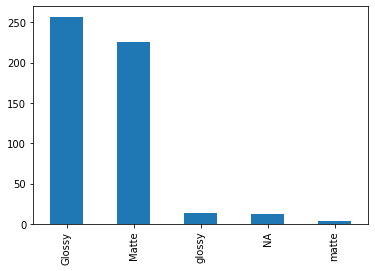

In [66]:
#plt.hist(df_train['ram'], bins = 30).show() #somewhat skewed, but seems plausible
#plt.hist(df_train['pixels_x'], bins = 30).show() #ok
df_train['screen_surface'].value_counts().plot('bar')

In [70]:
df_train["screen_surface"] = df_train["screen_surface"].str.lower()

In [71]:
df_train["screen_surface"].unique()

array(['glossy', 'matte', 'na'], dtype=object)

In [76]:
set(df_test.brand.str.lower().unique()) <= set(df_train.brand.str.lower().unique())

True

In [78]:
set(df_train.brand.str.lower().unique())

{'acer',
 'alienware',
 'apple',
 'asus',
 'dell',
 'google',
 'hp',
 'huawei',
 'jumper',
 'lenovo',
 'lg',
 'microsoft',
 'msi',
 'na',
 'other',
 'razer',
 'rca',
 'samsung',
 'toshiba'}

In [77]:
set(df_test.brand.str.lower().unique())

{'acer',
 'alienware',
 'apple',
 'asus',
 'dell',
 'google',
 'hp',
 'huawei',
 'lenovo',
 'lg',
 'microsoft',
 'msi',
 'other',
 'razer',
 'samsung'}

In [86]:
df_train.os_details.str.split(n=1).str[0].unique()

array(['Windows', 'NA', 'Chrome', 'OS', 'macOS', 'Android', nan, 'Mac'],
      dtype=object)

In [87]:
df_test.os_details.str.split(n=1).str[0].unique()

array(['Windows', 'Chrome', 'OS', 'macOS'], dtype=object)

In [88]:
df_train.brand.str.split(n=1).str[0].unique()

array(['Lenovo', 'Razer', 'NA', 'Acer', 'HP', 'Asus', 'Dell', 'MSI',
       'Apple', 'Samsung', 'Microsoft', 'Other', 'Alienware', 'Huawei',
       'LG', 'RCA', 'Toshiba', 'Google', 'Jumper'], dtype=object)

In [96]:
df_train[df_train.os_details.str.split(n=1).str[0].isna()].brand

310     Dell
395    Apple
Name: brand, dtype: object